In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('pps/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4


1 spectrum  in use
 
Spectral Data File: P0886010101PNS003SRSPEC000C.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.050e-03 +/- 6.230e-04 (43.9 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-11
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 2.416e+04 sec
 Using fit statistic: chi
 Using Background File                P0886010101PNS003BGSPEC000C.FTZ
  Background Exposure Time: 2.416e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY9.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0886010101PNS003SRCARF000C.FTZ



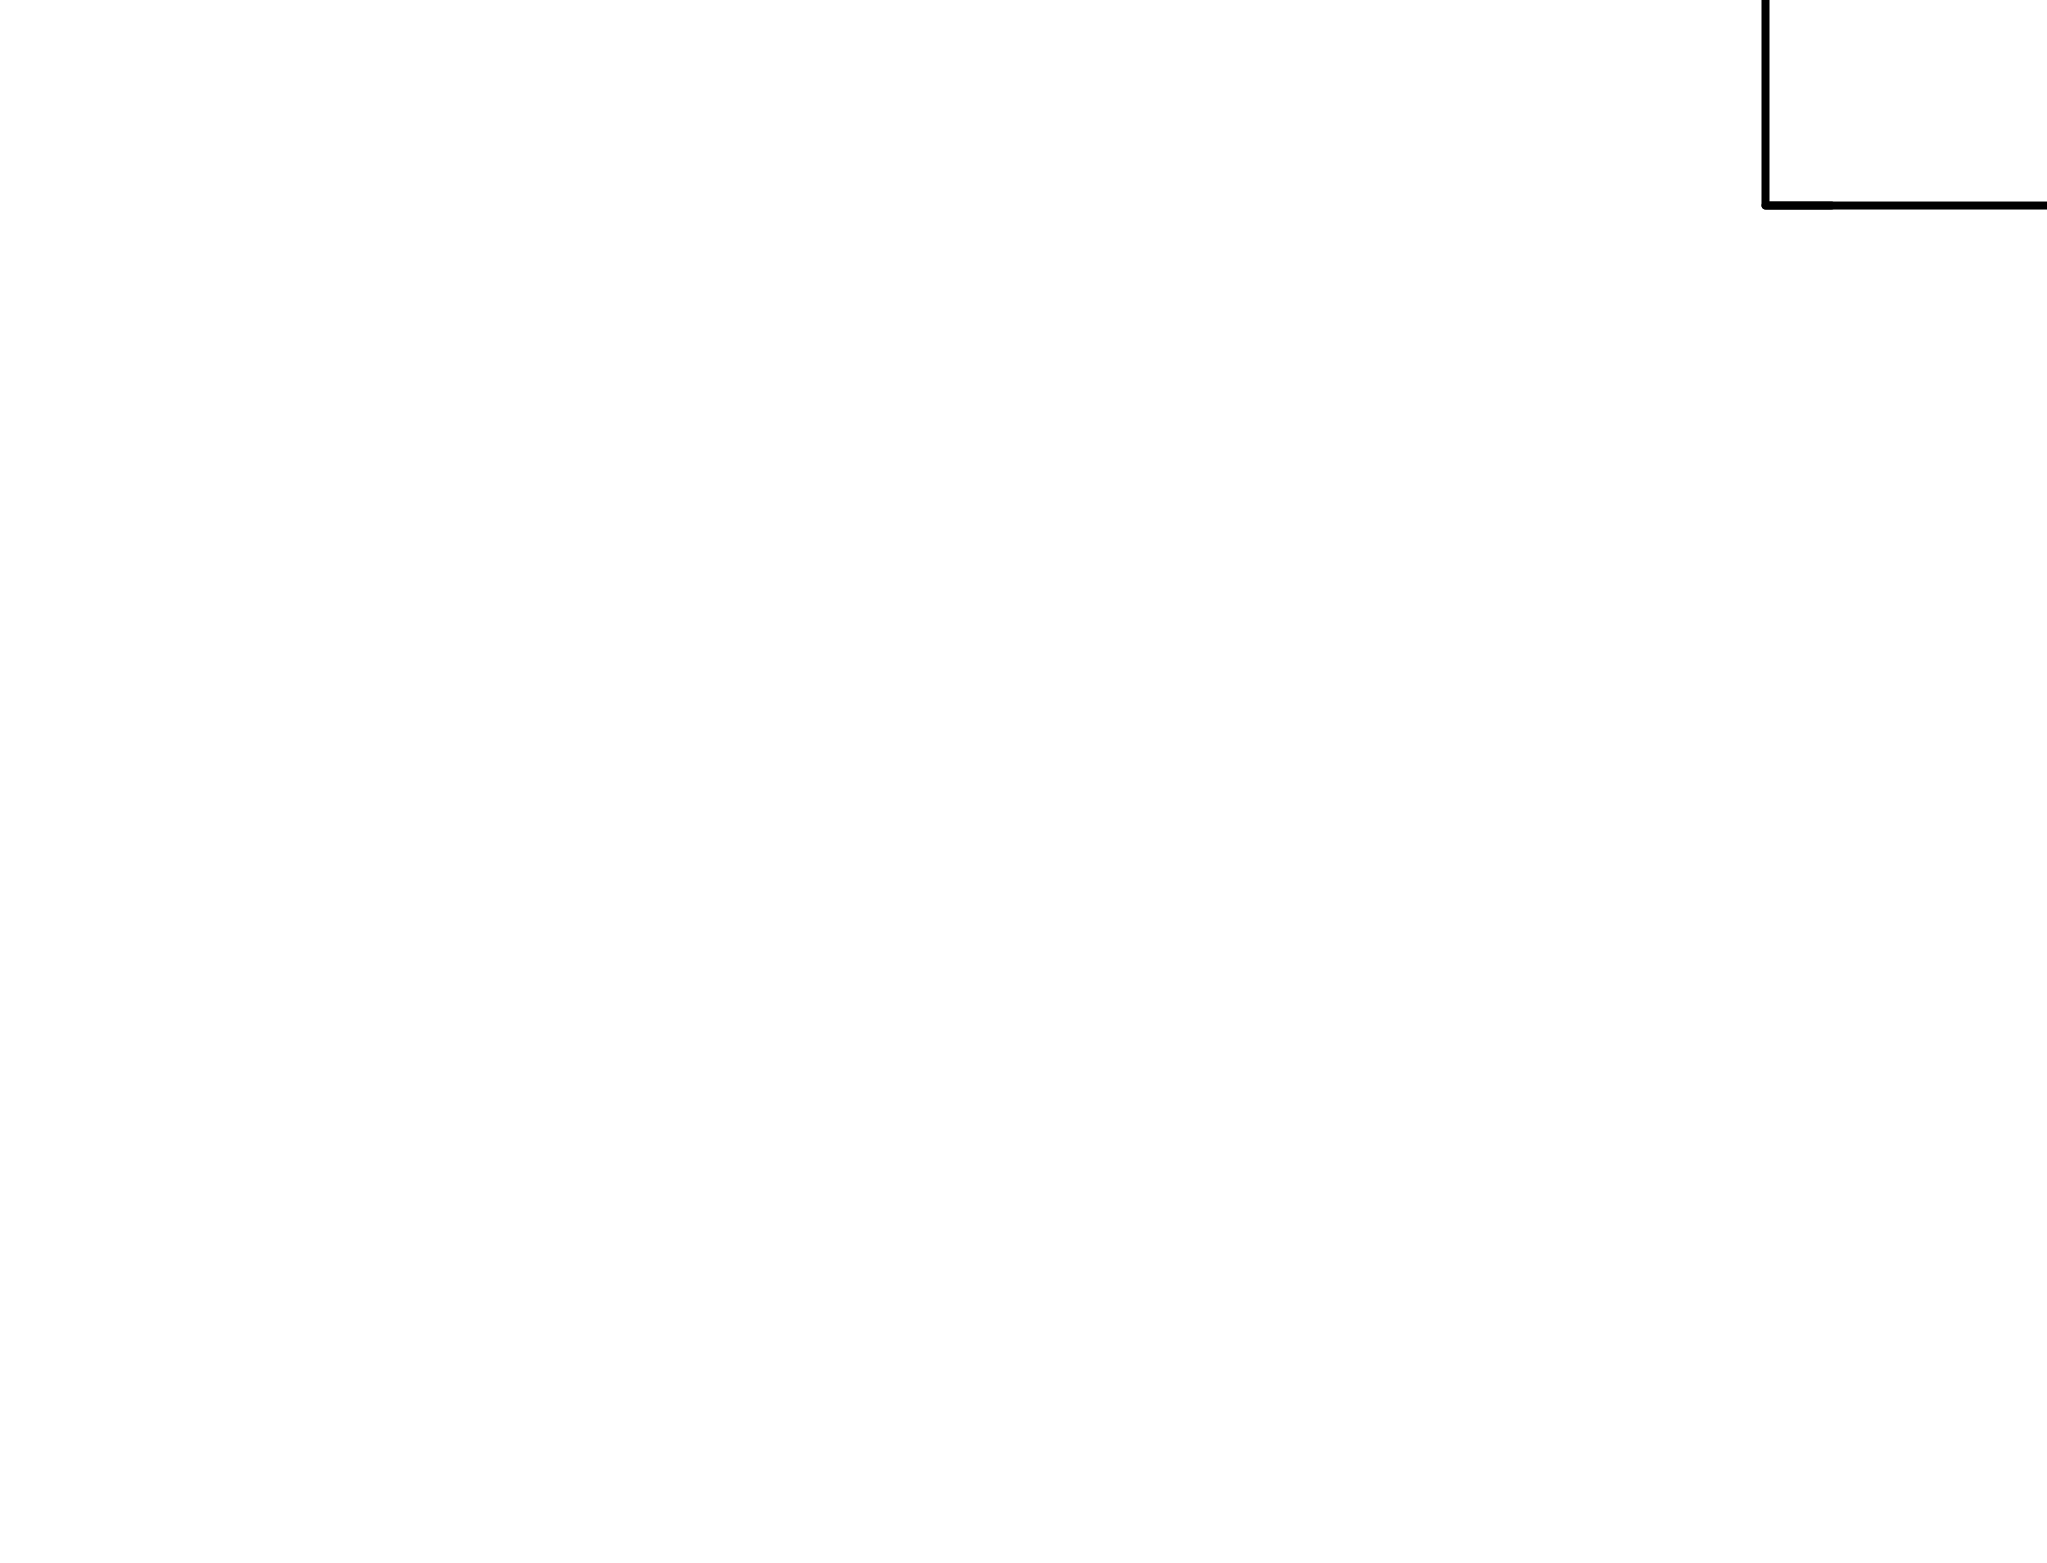

In [2]:
spec_fnames = glob.glob('P*PNS*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")

      No channels ignored (no channels in specified range)
     1 channels (11) ignored in spectrum #     1


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner

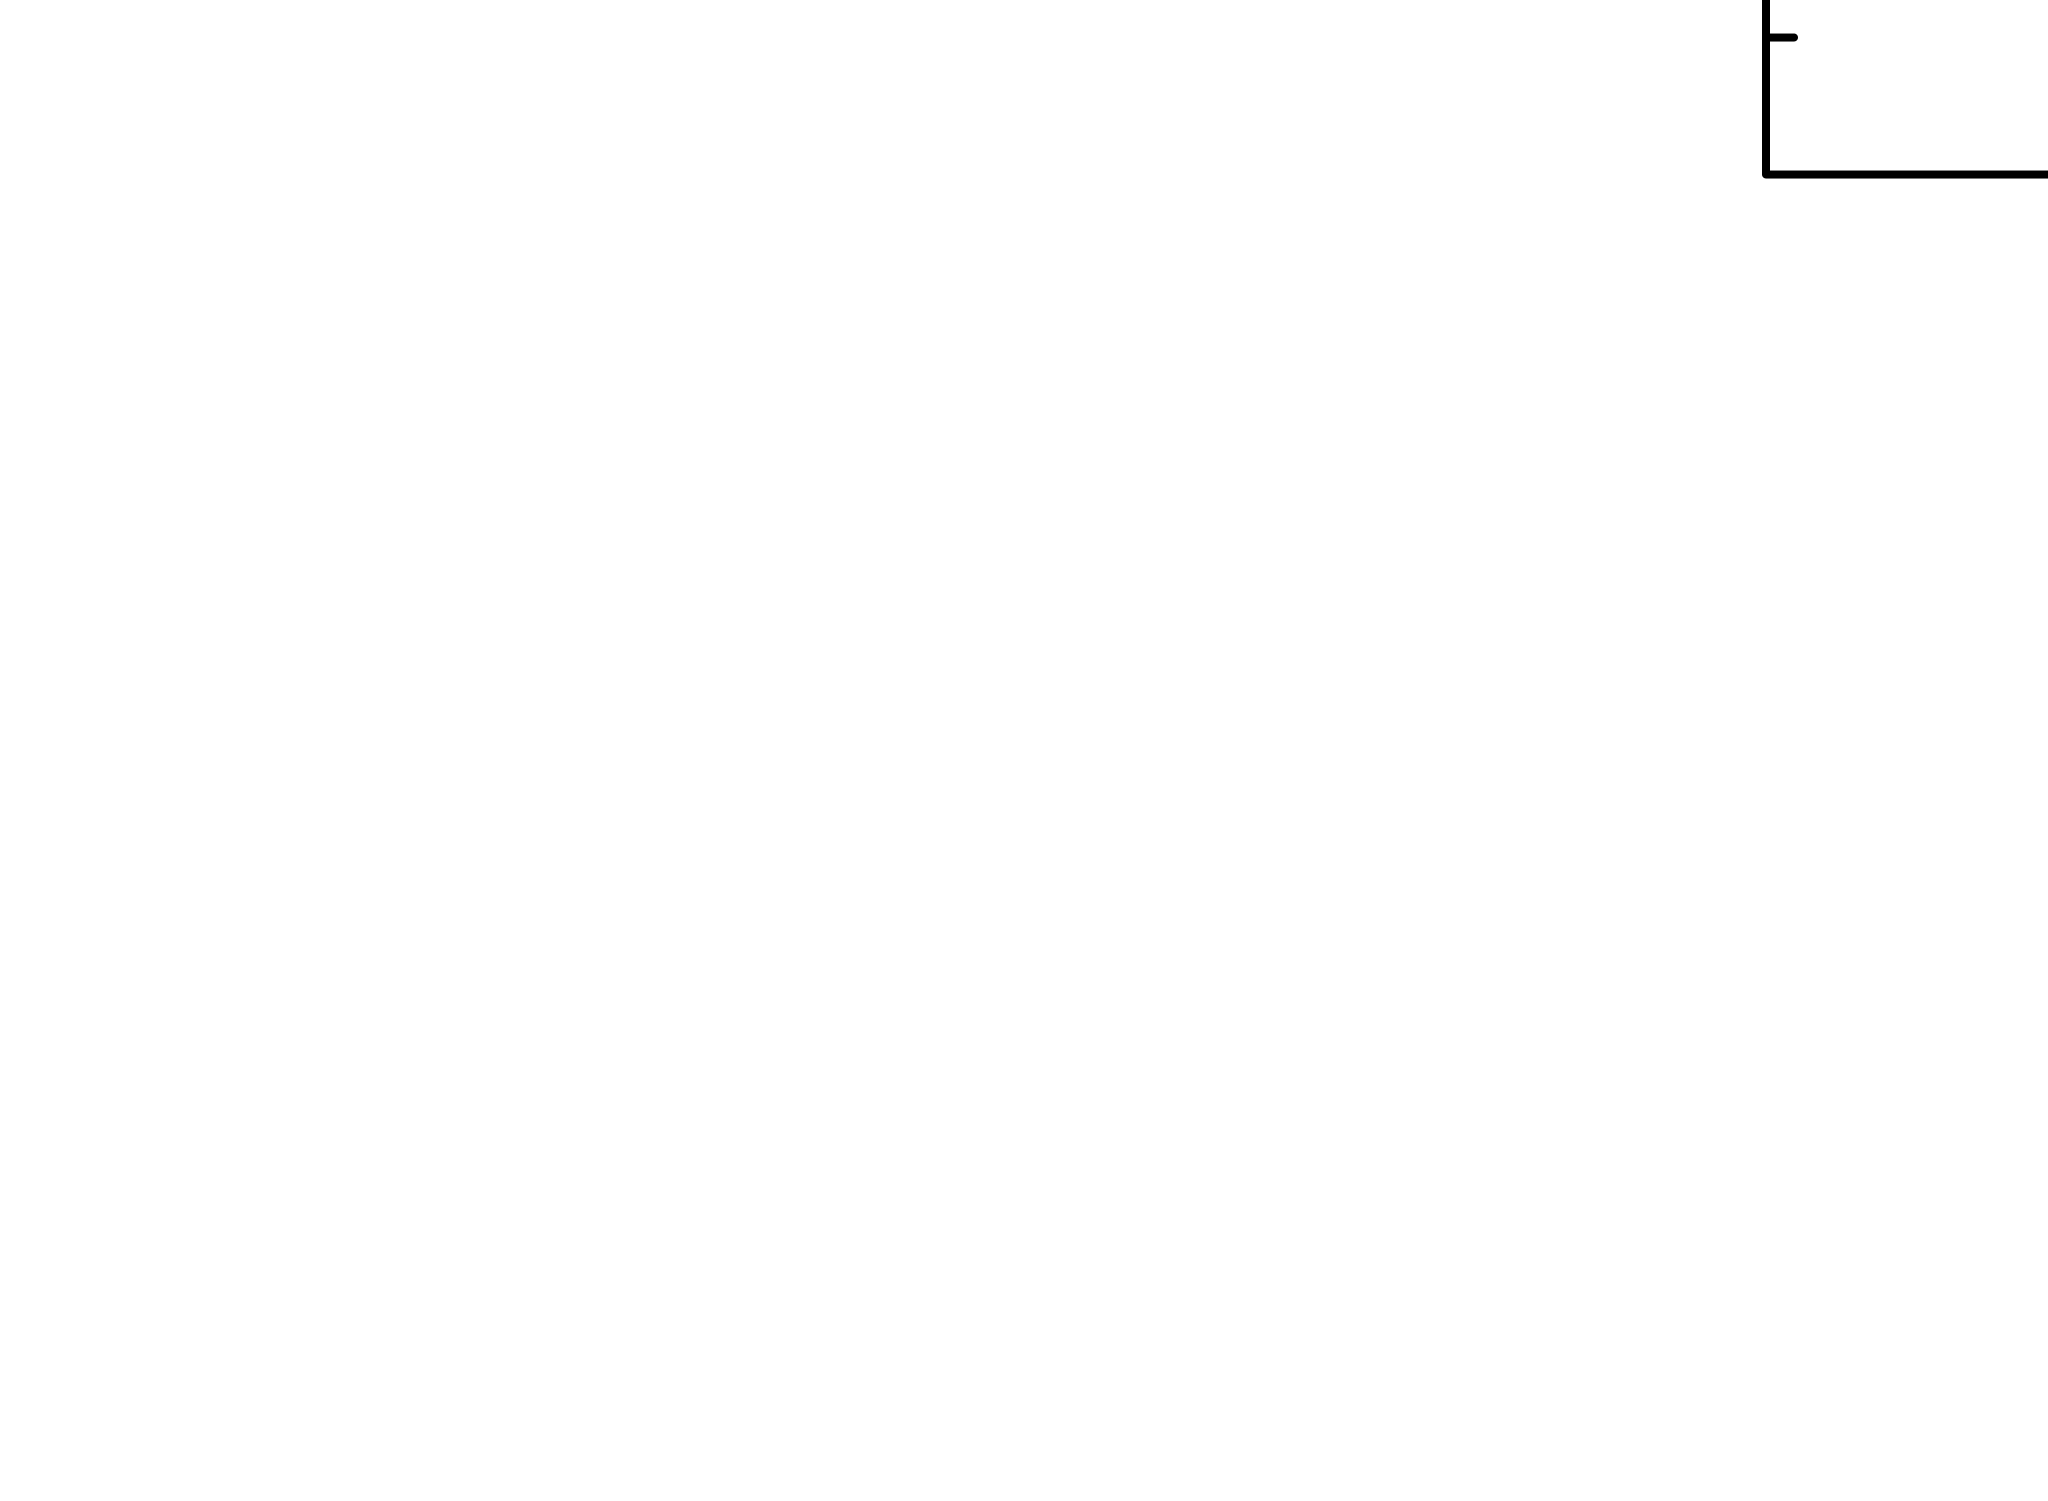

In [3]:
spec.ignore("**-0.2 12.0-**")
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

In [4]:
Fit.error("1")
Fit.error("2")

 Parameter   Confidence Range (2.706)
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
11.0098      0.064725      0   0.000280876       43.8556    0.00370726
 Variances and Principal Axes
                 1        2        3  
 3.4900E-07| -0.0003  -0.0002   1.0000  
 3.4222E-01|  1.0000   0.0008   0.0003  
 1.3726E+05| -0.0008   1.0000   0.0002  
----------------------------------------

  Covariance Matrix
        1           2           3   
   4.257e-01  -1.071e+02  -2.648e-02
  -1.071e+02   1.373e+05   3.409e+01
  -2.648e-02   3.409e+01   8.469e-03
------------------------------------

Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    2.80876E-04  +/-  0.652494     
   2    2   bbody      kT         keV      43.8556      +/-  370.483      
   3    2   bbody      norm                3.70726E-03  +/-  9.20258E-02  


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.089185e+12     using 10 bins.

Test statistic : Chi-Squared              1.089185e+12     using 10 bins.
 Null hypothesis probability of 0.000000e+00 with 7 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
19.6533      2.2267       -3      0.385313      -2.00481   3.56482e-08
16.7502      7.44675e+07  -1     0.0762352      -1.95092   4.62218e-08
15.4838      4.60779e+07  -1     0.0326793      -1.87881   5.66936e-08

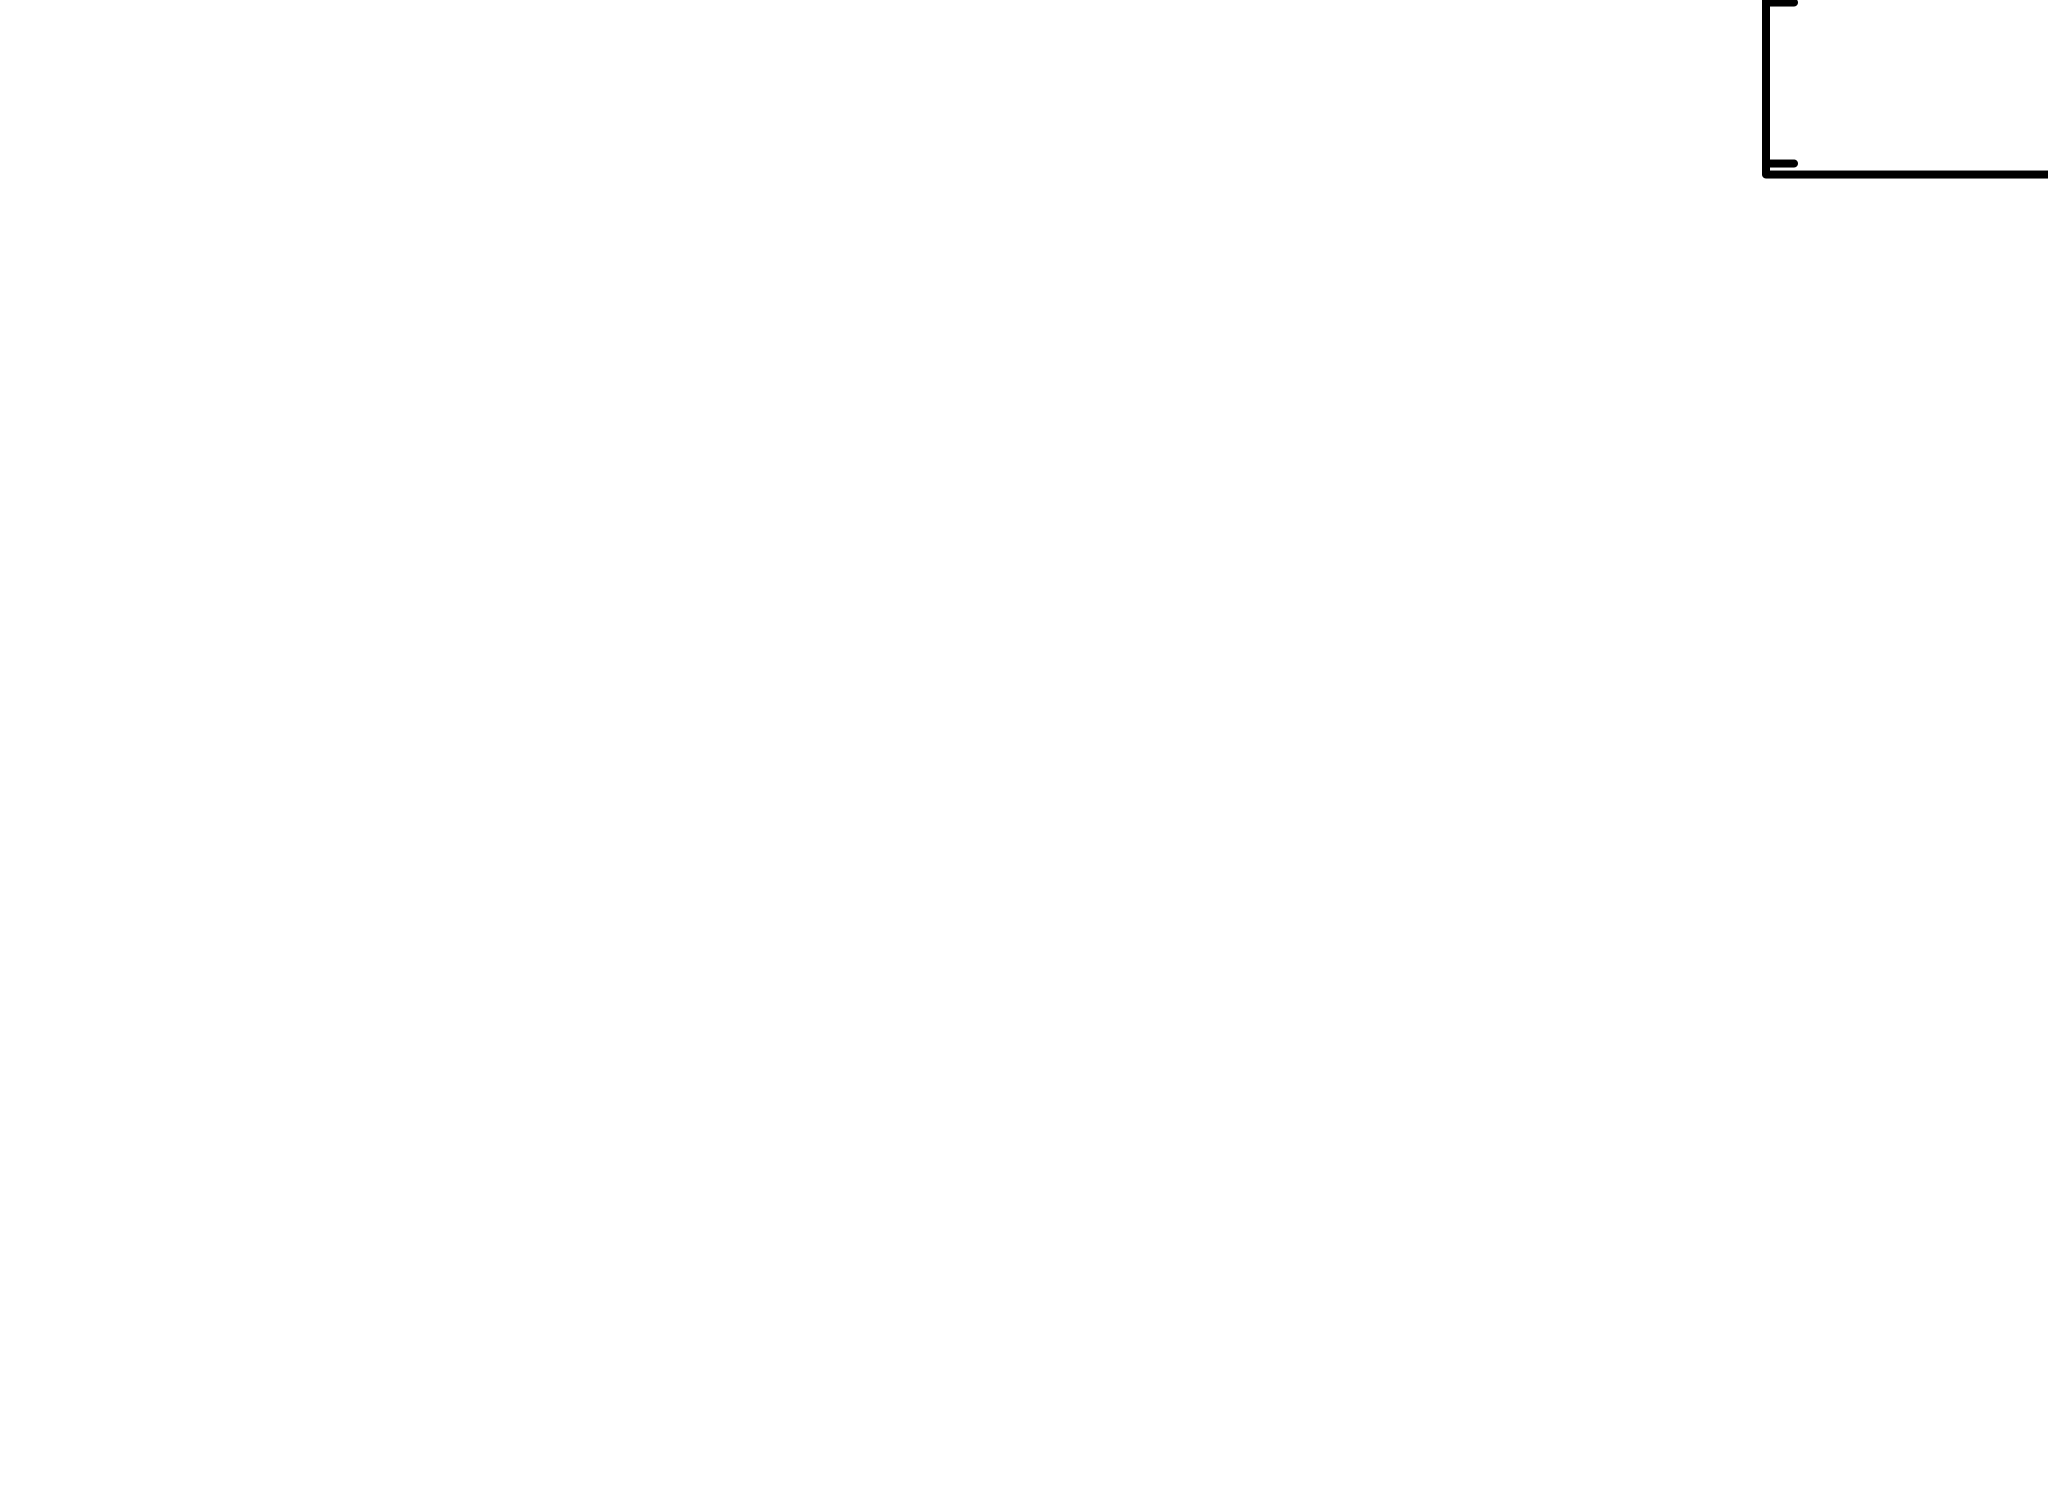

In [5]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

In [6]:
Fit.error("1")
Fit.error("2")

 Parameter   Confidence Range (2.706)
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
11.0144      0.326586     14   9.91439e-15      -1.00169   3.32055e-07
 Variances and Principal Axes
                 1        2        3  
 2.7952E-15| -0.0000  -0.0000   1.0000  
 8.3563E-02|  0.8252  -0.5649  -0.0000  
 3.5500E-01|  0.5649   0.8252   0.0000  
----------------------------------------

  Covariance Matrix
        1           2           3   
   1.702e-01   1.265e-01   8.152e-08
   1.265e-01   2.684e-01   1.553e-07
   8.152e-08   1.553e-07   9.328e-14
------------------------------------

Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    9.91439E-15  +/-  0.412522     
   2    2   powerlaw   PhoIndex            -1.00169     +/-  0.518066     
   3    2   powerlaw   norm                3.32055E-07  +/-  3.05411E-0

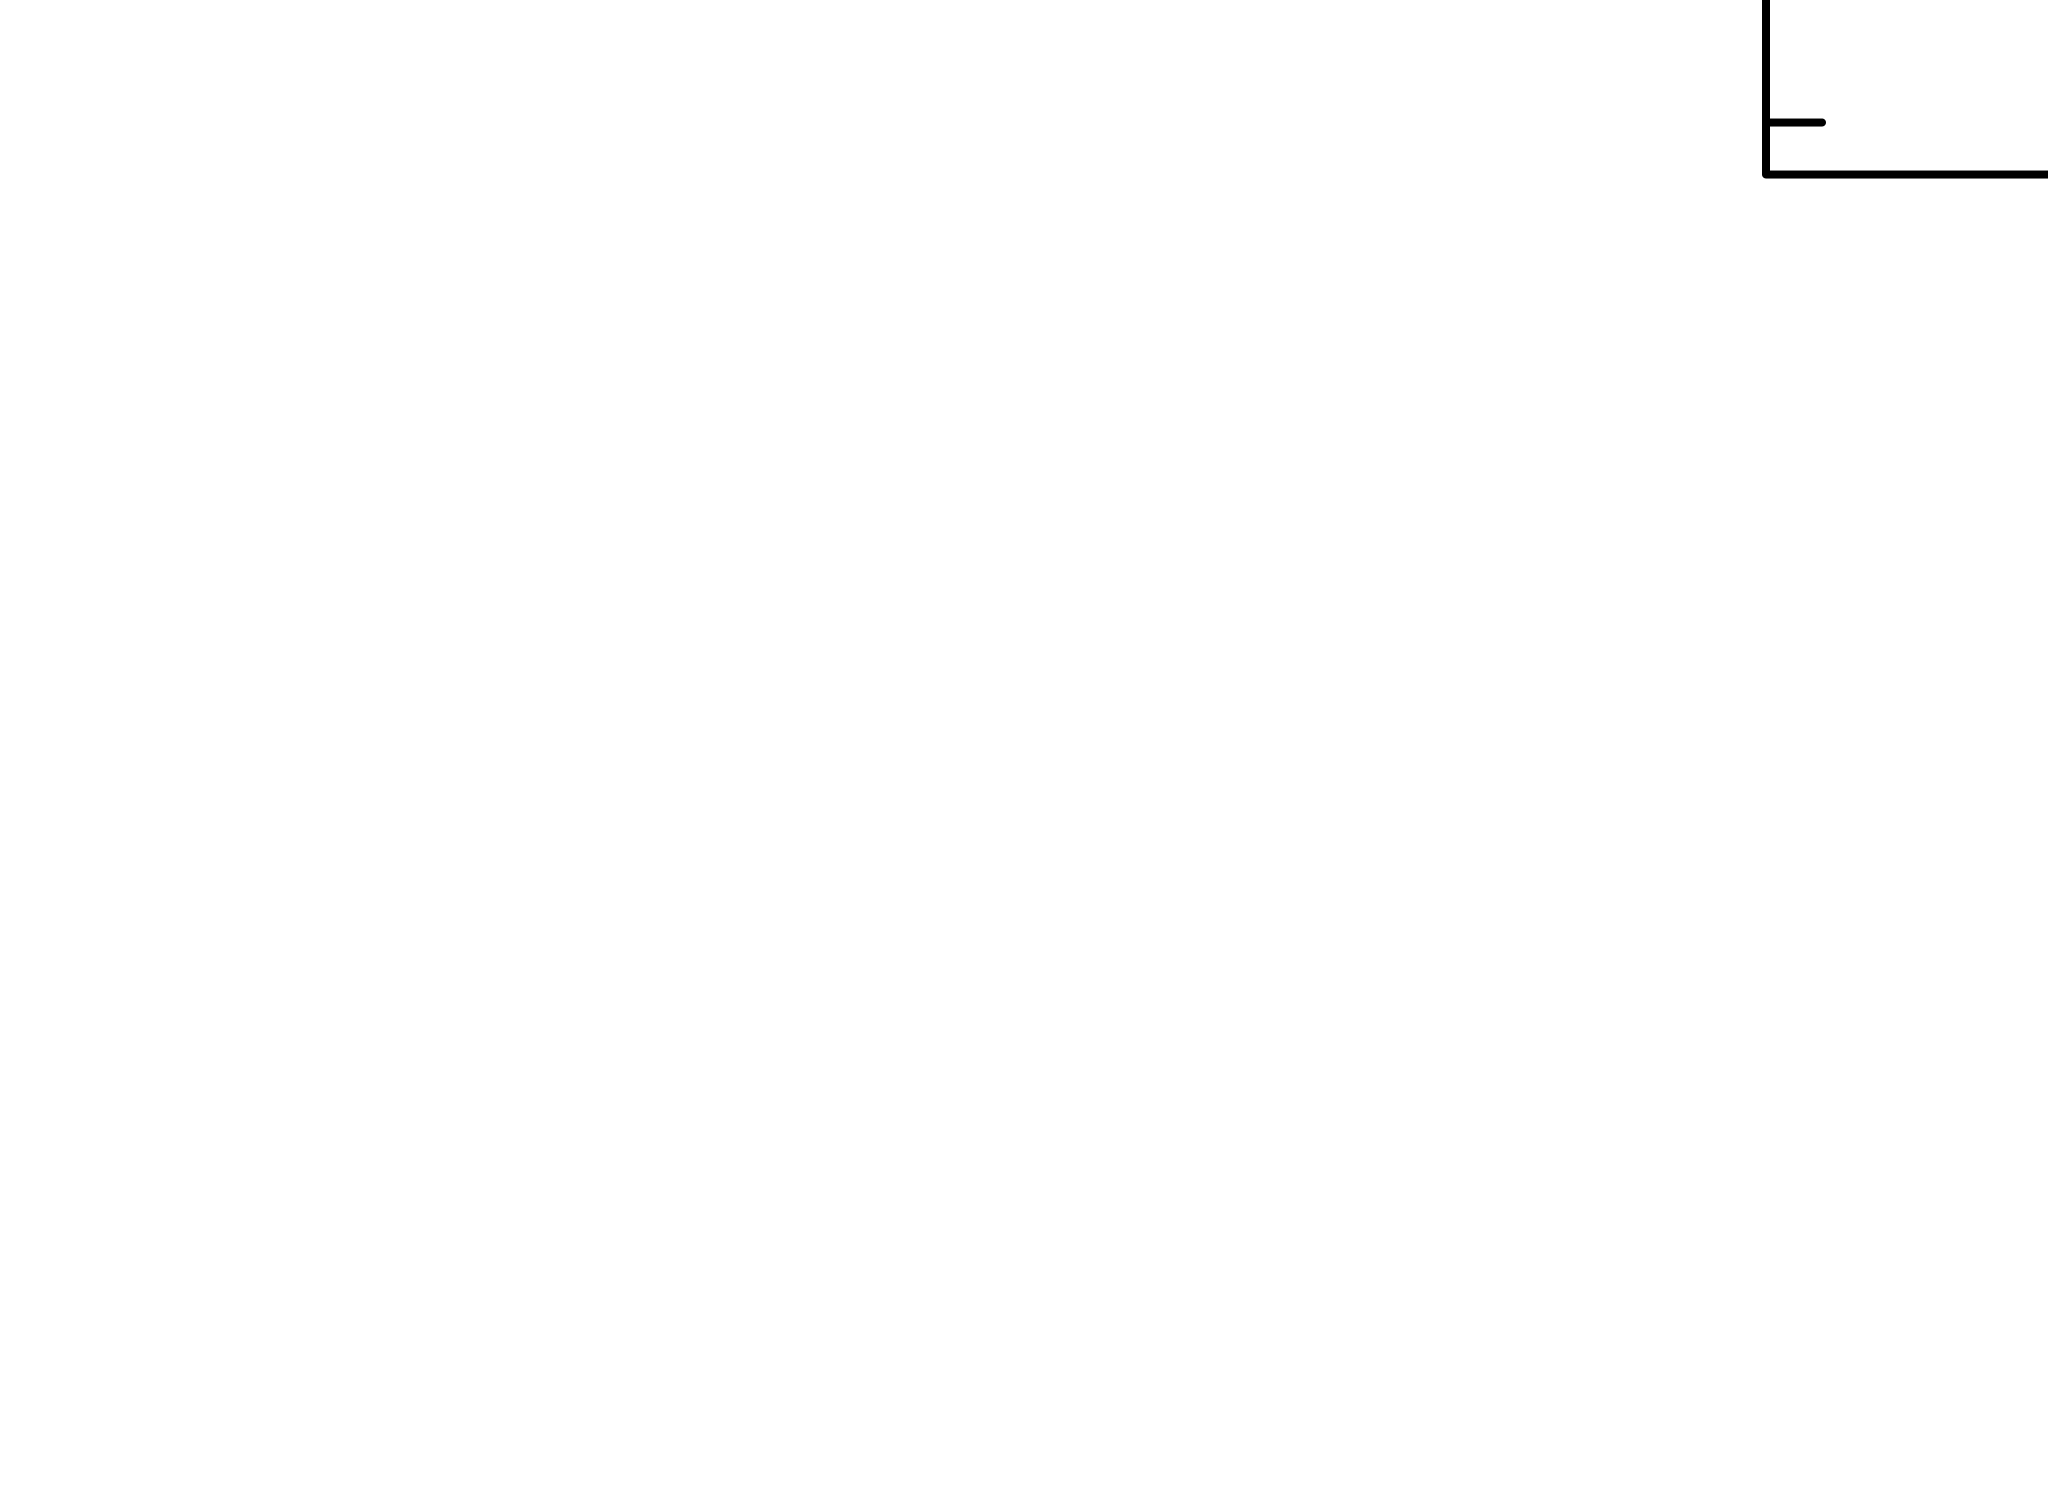


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              5.917478e+10     using 10 bins.

Test statistic : Chi-Squared              5.917478e+10     using 10 bins.
 Null hypothesis probability of 0.000000e+00 with 7 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
45.5644      0.646739     -2       2.10775      0.970792   2

In [7]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

In [8]:
Fit.error("1")
Fit.error("2")

 Parameter   Confidence Range (2.706)
     1      19.1516      73.8037    (-20.3538,34.2983)
 Parameter   Confidence Range (2.706)

***Warning: Number of trials exceeded before convergence.
Current trial values 8.86208, 0.008
and delta statistic 1.96047, 40.6329

Continue error search in this direction? ***Warning: Parameter pegged at hard limit: 64
     2      5.68815            0    (-51.8606,-57.5488)



Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.050452e+11     using 10 bins.

Test statistic : Chi-Squared              2.050452e+11     using 10 bins.
 Null hypothesis probability of 0.000000e+00 with 7 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
32.5893      0.756644      0       1.16484       19.7418   7.69964e-06
30.9476      158464        0       1.05157       90.6805   9.99133e-06
27.3097      140286       -1       1.78015       199.088   1.77625e-05
2

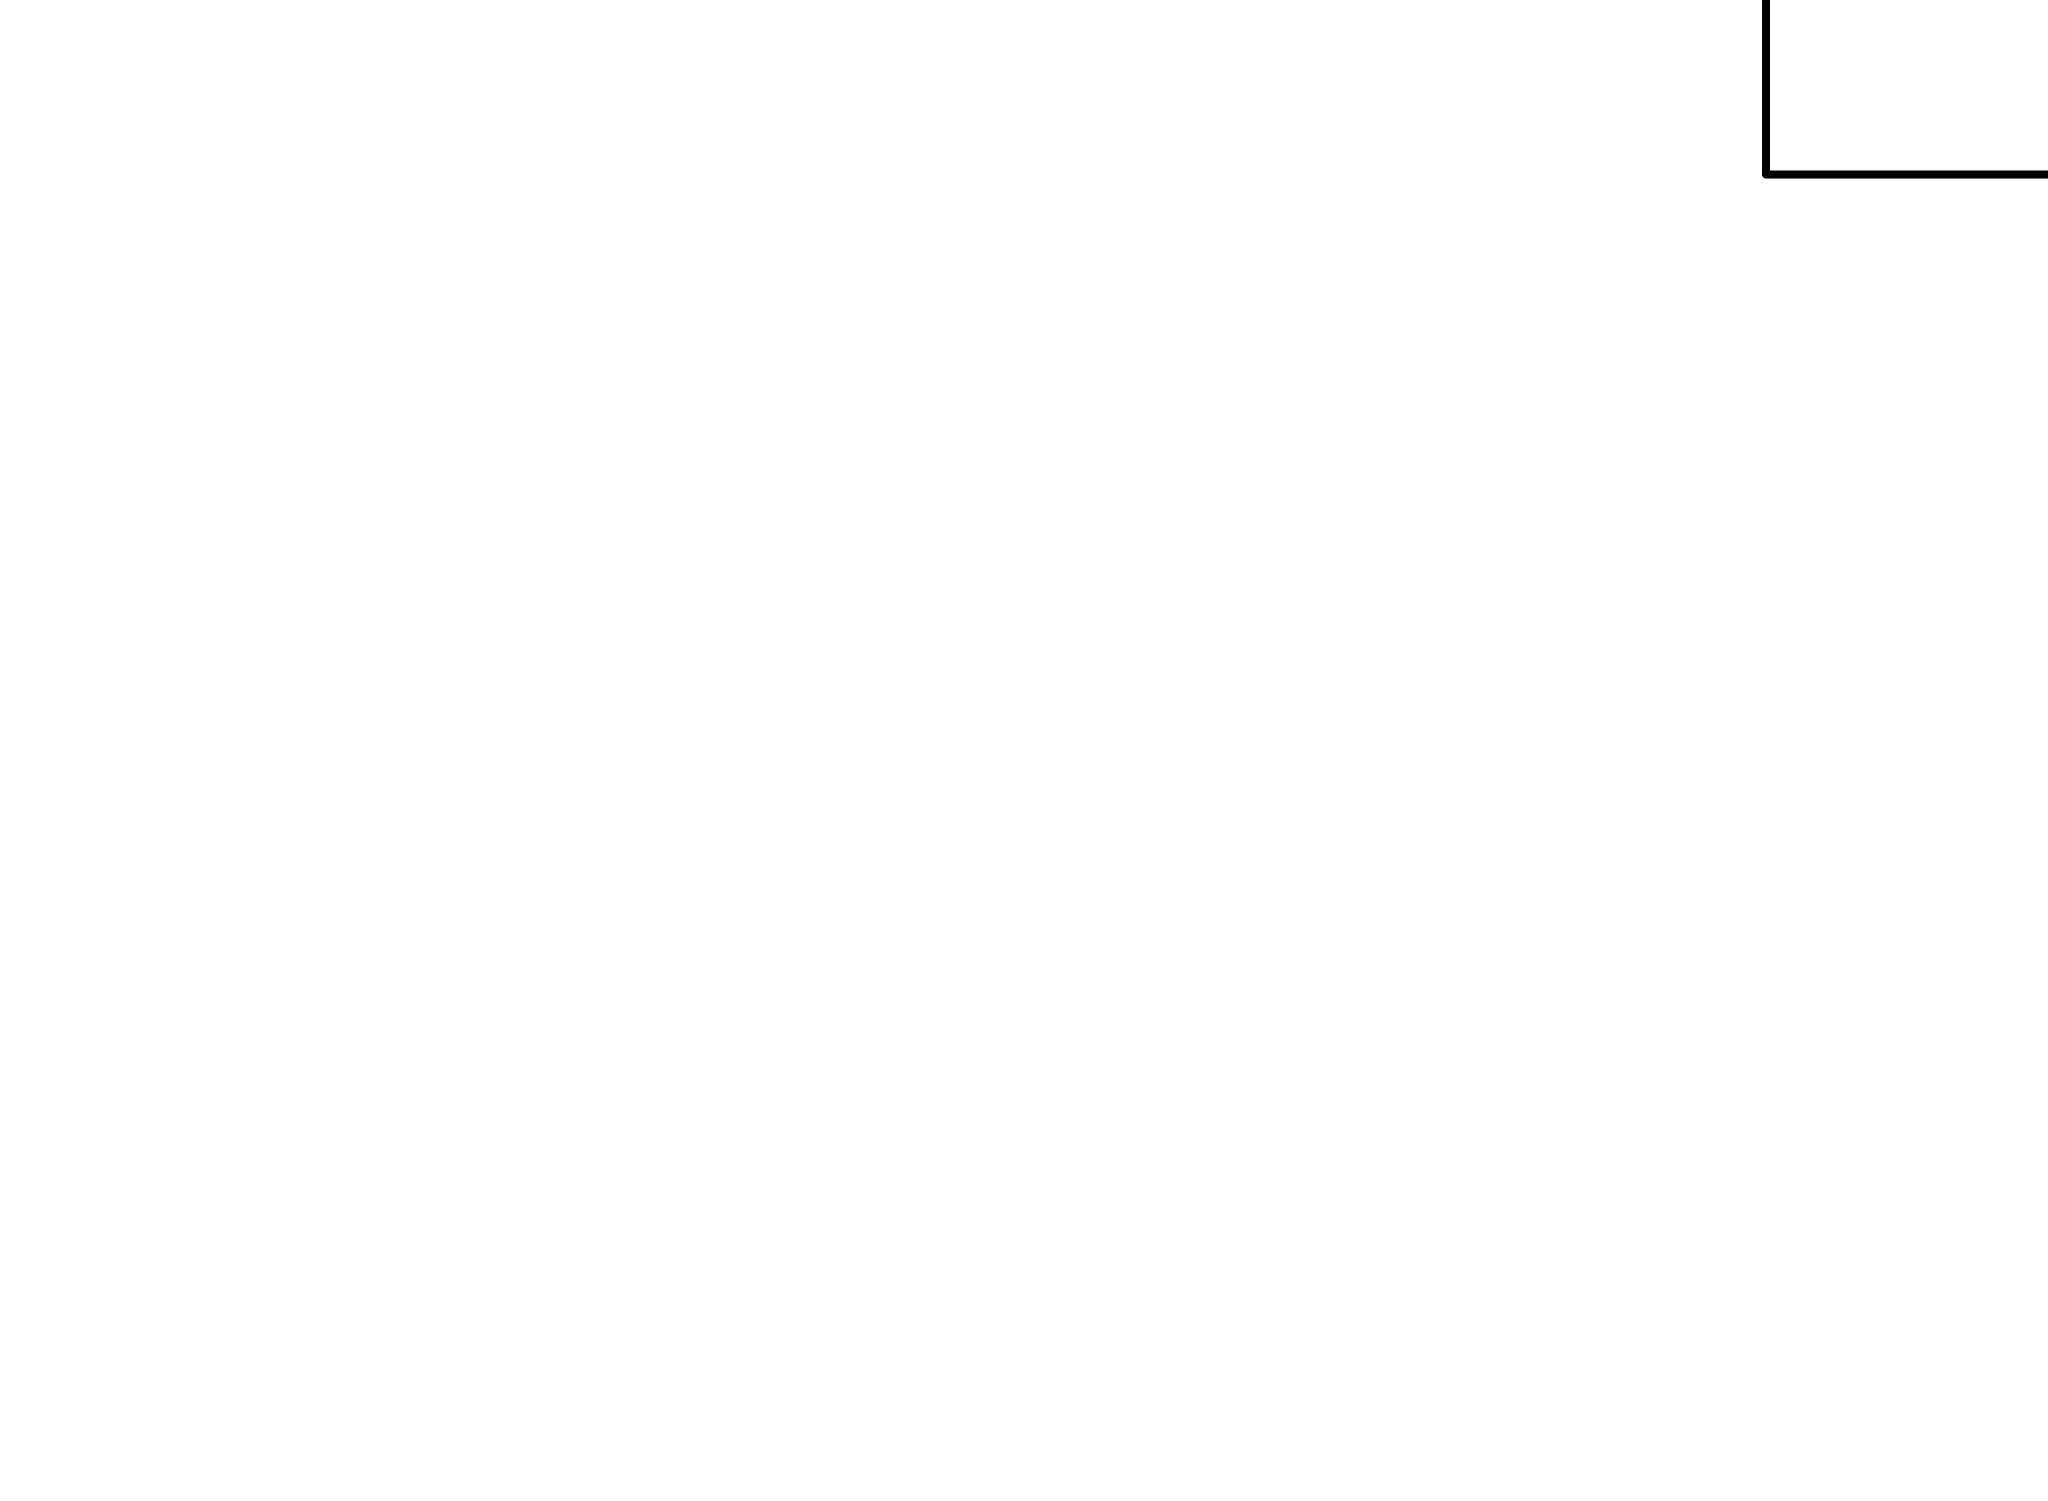

In [9]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")

In [10]:
AllModels.calcFlux(".2 12.0")

 Model Flux 1.2796e-05 photons (1.4639e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [11]:
#plx = 1.4843
d_kpc = 8
F_x = 1.4639*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

1.1206574113232897e+33


In [12]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

8
33.04947286762488


In [13]:
F_opt = 1.05*10**-5 * 10**(-0.4*20.78)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  5.119049146085544e-14
F_x / F_opt:  0.4563221117156163


In [14]:
Fit.error("2")

 Parameter   Confidence Range (2.706)
***Warning: Zero alpha-matrix diagonal element for parameter 1
***Warning: Zero alpha-matrix diagonal element for parameter 3
 Parameter 1 is pegged at 78.0628 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.
 Parameter 3 is pegged at 0.00171289 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.

 Fit error occurred during lower bound error calculation.

***Warning: Number of trials exceeded before bracketing of delta fit-stat.
Last attempt: 200, with delta statistic: 0.790164

Continue error search in this direction? 
*** Parameter upper bound is INVALID.

     2            0            0    (-2.81721,-2.81721)



***XSPEC Error:  No variable parameters for fit 


Model TBabs<1>(bremss<2> + gaussian<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
   4    3   gaussian   LineE      keV      6.50000      +/-  0.0          
   5    3   gaussian   Sigma      keV      0.100000     +/-  0.0          
   6    3   gaussian   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.193375e+12     using 10 bins.

Test statistic : Chi-Squared              1.193375e+12     using 10 bins.
 Null hypothesis probability of 0.000000e+00 with 4 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.544821e+12     using 10 bins.

Test statistic 

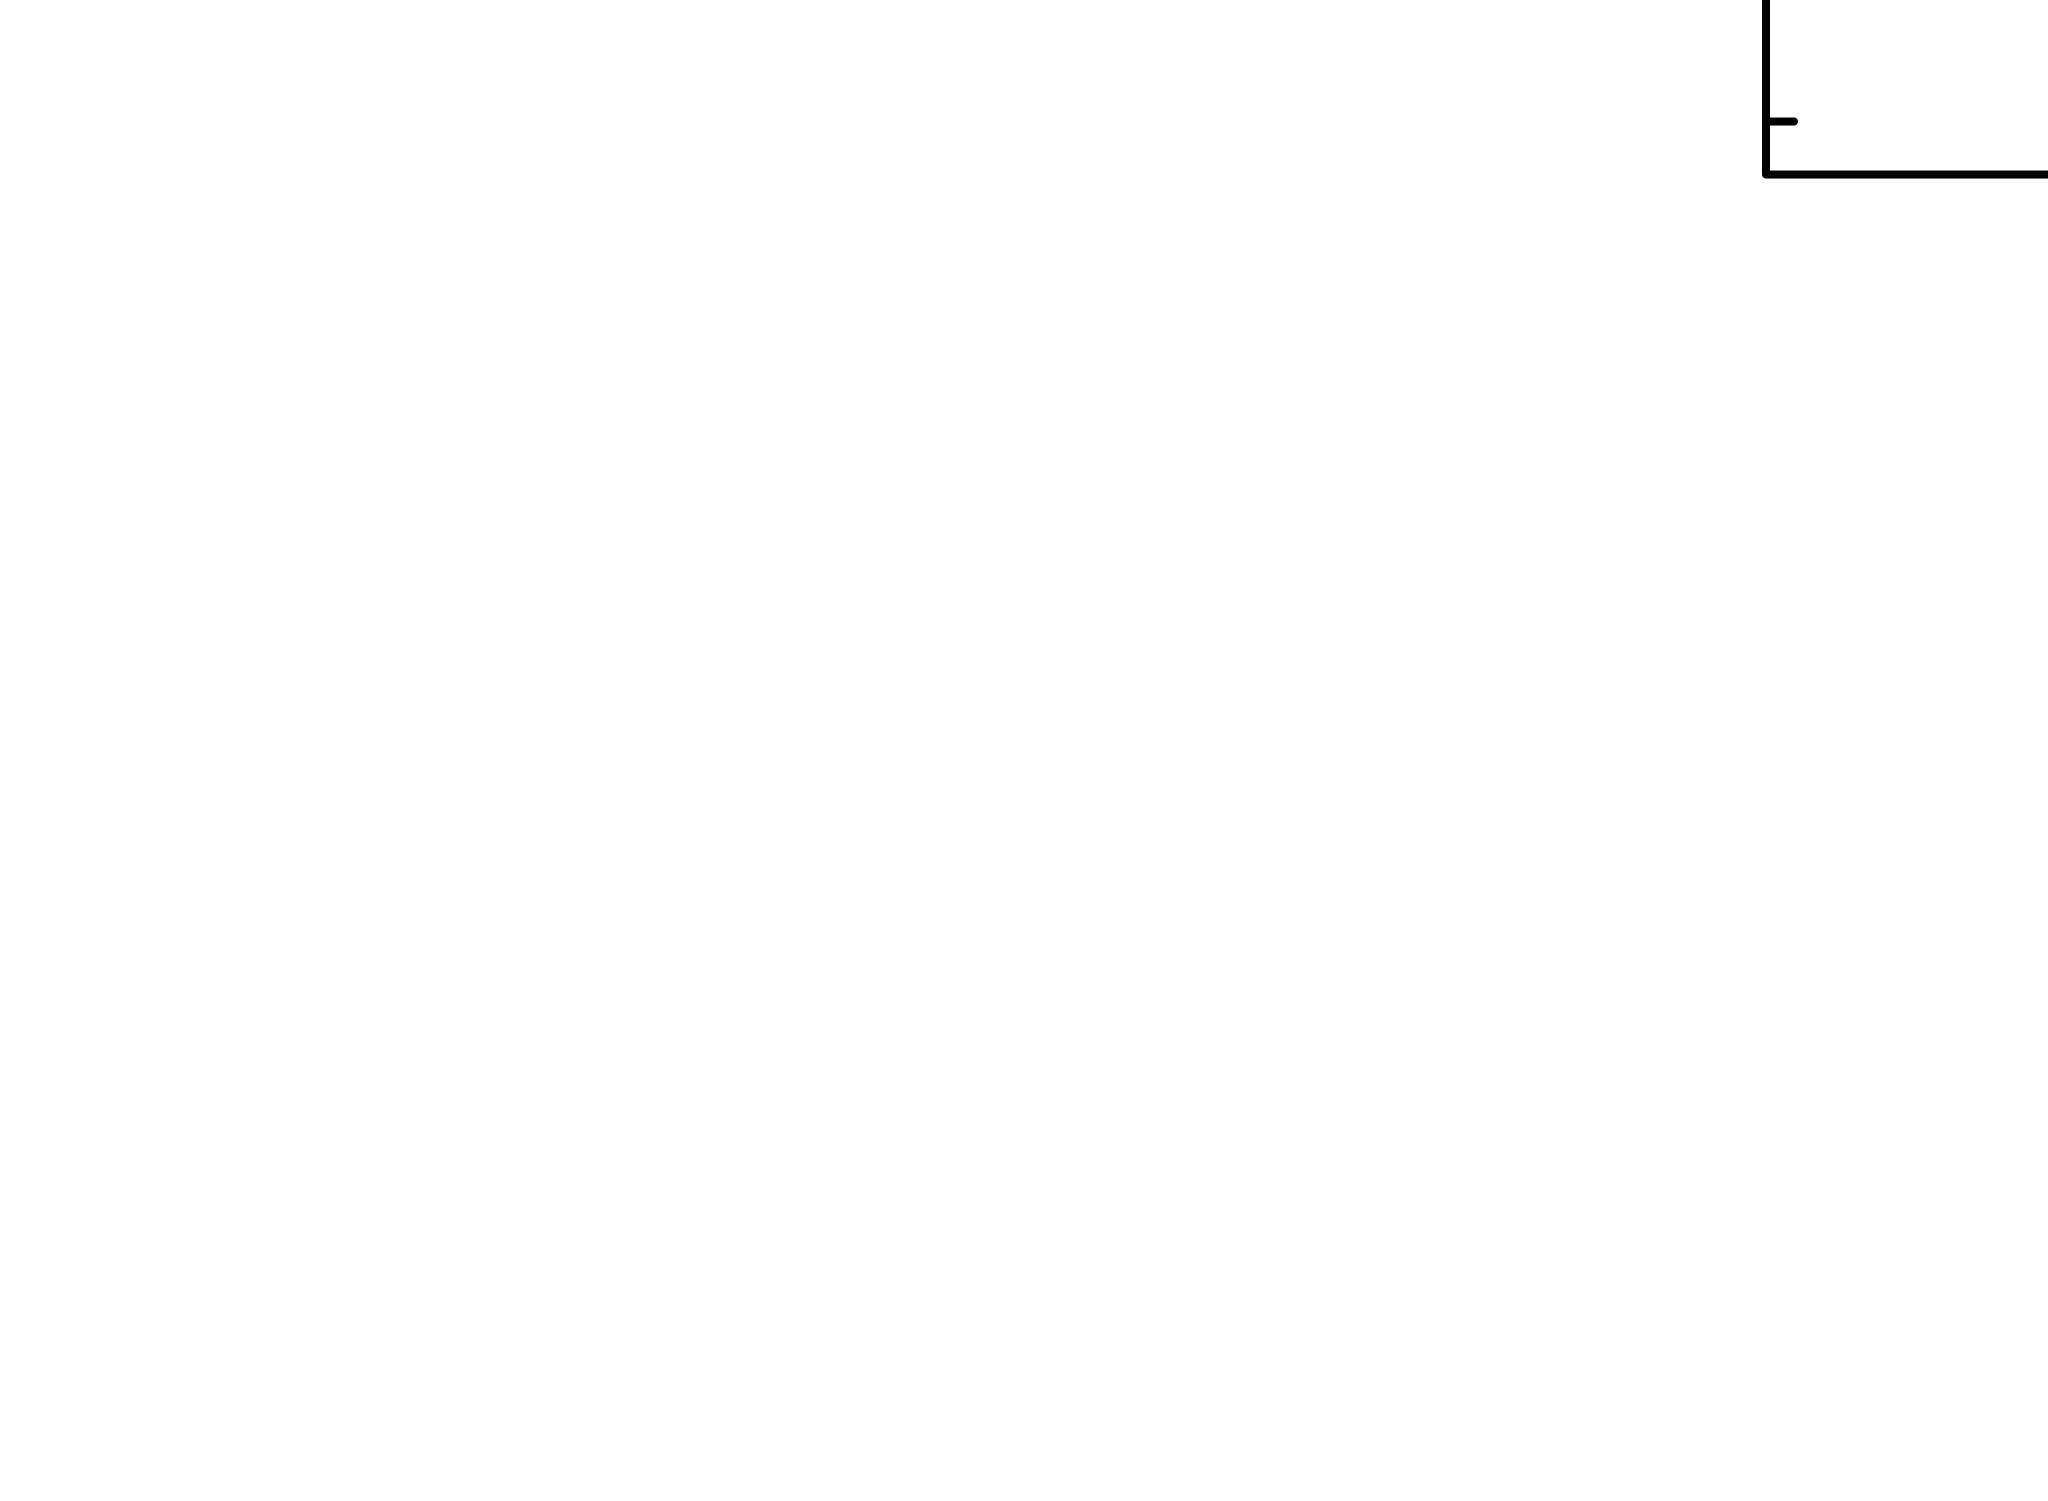


Fit statistic  : Chi-Squared              1.544821e+12     using 10 bins.

Test statistic : Chi-Squared              1.544821e+12     using 10 bins.
 Null hypothesis probability of 0.000000e+00 with 5 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm       5:Sigma        6:norm
29.0513      245045       -2      0.188358       197.439   9.56267e-07      0.445274   3.22940e-06
8.75123      428094       -2       1.94465       199.218   1.13432e-05       1.65715   7.87067e-06
7.32189      131670       -3      0.911047       199.326   1.05624e-05      0.842847   9.48103e-06
7.09628      127656       -4      0.888022       78.4442   2.65194e-06       1.20317   1.02692e-05
4.97431      128300       -3      0.520230       28.8109   3.23334e-06       1.25327   1.03950e-05
4.35055      86701.4      -4      0.742118       56.7349   5.67401e-06       1.24369   1.02512e-05
4.3

In [15]:
AllModels.clear()
mo = Model("tbabs*(bremss+gaussian)")
mo.gaussian.LineE = 6.7
mo.gaussian.LineE.frozen = True
Fit.perform()
Plot("data resid")

In [16]:
Fit.error("1")
Fit.error("2")

 Parameter   Confidence Range (2.706)
     1   0.00585523      9.04917    (-0.772165,8.27115)
 Parameter   Confidence Range (2.706)
***Warning: Zero alpha-matrix diagonal element for parameter 3
 Parameter 3 is pegged at 5.92994e-06 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.
***Warning: Zero alpha-matrix diagonal element for parameter 3
 Parameter 3 is pegged at 5.92994e-06 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.
***Warning: Zero alpha-matrix diagonal element for parameter 3
 Parameter 3 is pegged at 5.92994e-06 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.
***Warning: Zero alpha-matrix diagonal element for parameter 1
 Parameter 1 is pegged at 1.8315e-17 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.
***Warning: Zero alpha-matrix diagonal element for parameter 


Model TBabs<1>(bremss<2> + gaussian<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
   4    3   gaussian   LineE      keV      6.50000      +/-  0.0          
   5    3   gaussian   Sigma      keV      0.100000     +/-  0.0          
   6    3   gaussian   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.193375e+12     using 10 bins.

Test statistic : Chi-Squared              1.193375e+12     using 10 bins.
 Null hypothesis probability of 0.000000e+00 with 4 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.589659e+12     using 10 bins.

Test statistic 

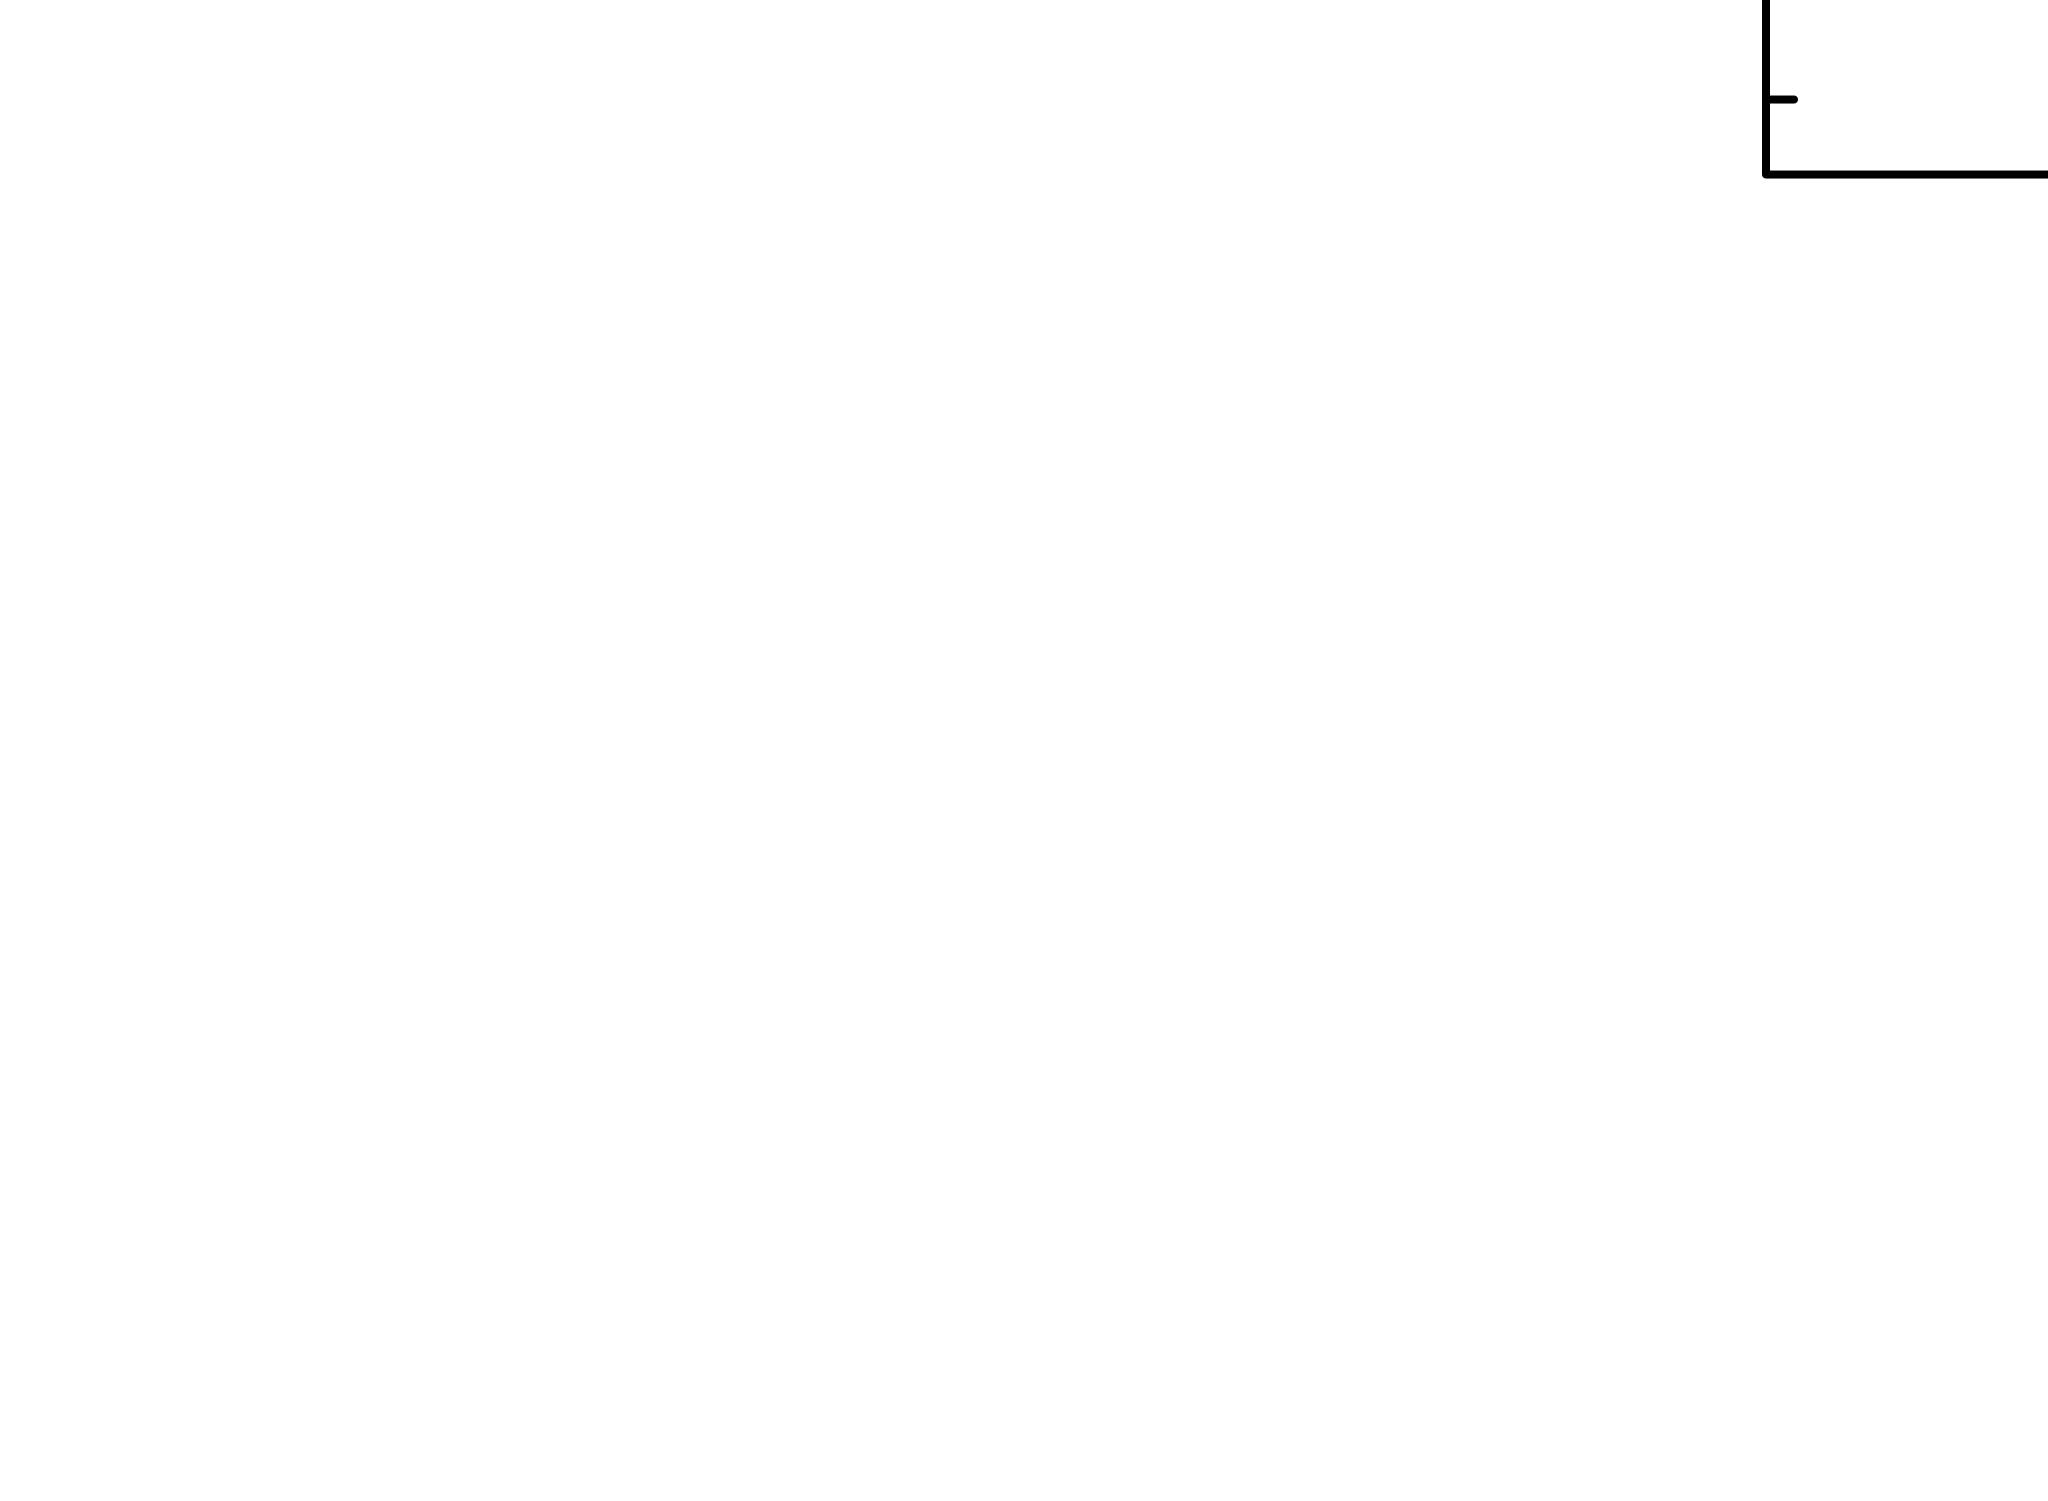

0  
------------------------------------------------------------

  Covariance Matrix
        1           2           3           4           5   
   2.542e+00  -1.756e+04  -2.483e-04   3.875e-01   6.399e-06
  -1.756e+04   1.580e+08   2.265e+00  -4.093e+03  -6.303e-02
  -2.483e-04   2.265e+00   3.249e-08  -5.938e-05  -9.101e-10
   3.875e-01  -4.093e+03  -5.938e-05   1.795e-01   1.990e-06
   6.399e-06  -6.303e-02  -9.101e-10   1.990e-06   2.980e-11
------------------------------------------------------------

Model TBabs<1>(bremss<2> + gaussian<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    0.726290     +/-  1.59423      
   2    2   bremss     kT         keV      199.363      +/-  1.25712E+04  
   3    2   bremss     norm                9.67541E-06  +/-  1.80254E-04  
   4    3   gaussian   LineE      keV      6.40000      frozen
   5    3   gaussian   Sigma      keV      0.979824     +/-  0.423675   

In [17]:
AllModels.clear()
mo = Model("tbabs*(bremss+gaussian)")
mo.gaussian.LineE = 6.4
mo.gaussian.LineE.frozen = True
Fit.perform()
Plot("data resid")

In [18]:
Fit.error("2")

 Parameter   Confidence Range (2.706)
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm       5:Sigma        6:norm
2.98342      0.0523747     0      0.732583       199.363   8.88432e-06      0.981362   8.75080e-06
 Variances and Principal Axes
                 1        2        3        5        6  
 2.4309E-12| -0.0000  -0.0000   0.1890  -0.0000   0.9820  
 1.2279E-11|  0.0000   0.0000  -0.9820  -0.0000   0.1890  
 6.5082E-02|  0.1130   0.0000  -0.0000   0.9936   0.0000  
 7.2455E-01|  0.9936   0.0001   0.0000  -0.1130  -0.0000  
 1.9518E+08| -0.0001   1.0000   0.0000  -0.0000  -0.0000  
------------------------------------------------------------

  Covariance Matrix
        1           2           3           4           5   
   3.149e+00  -2.179e+04  -2.825e-04   4.440e-01   7.372e-06
  -2.179e+04   1.952e+08   2.563e+00  -4.640e+03  -7.191e-02
  -2.825e-04   2.563e+00   3.370e-08  -6.166e-05  -9.511e-10
   4.440e-